In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Model,Input
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D,Input,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201 
from tensorflow.keras.utils import plot_model 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import np_utils

generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=8,
    height_shift_range=0.15,
    zoom_range=0.2
    )
trainGen = generator.flow_from_directory(
    "./drive/MyDrive/train",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)
valGen = generator.flow_from_directory(
    "./drive/MyDrive/val",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)
testGen = generator.flow_from_directory(
    "./drive/MyDrive/test",
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1
)
print("Train:",trainGen.class_indices)
print("Test:",testGen.class_indices)
print("Val:",valGen.class_indices)

Found 7401 images belonging to 4 classes.
Found 920 images belonging to 4 classes.
Found 924 images belonging to 4 classes.
Train: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}
Test: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}
Val: {'COVID-19': 0, 'Normal': 1, 'Pneumonia-Bacterial': 2, 'Pneumonia-Viral': 3}


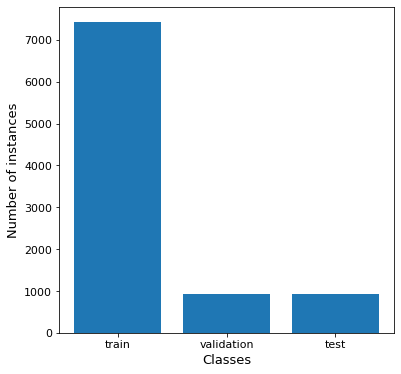

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(['train','validation','test'],[len(trainGen)*32,
                                       len(valGen)*32,
                                       len(testGen)])
plt.xlabel("Classes",size=13)
plt.ylabel("Number of instances",size=13)
plt.tick_params(which='both',axis='both',labelsize=11)
plt.show()

In [ ]:
#sınıflandırma problemlemi,çok sınıf tek etiket
model_d=tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights='imagenet')
model_d.trainable=False
x=model_d.output

x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(64,activation='relu')(x)
preds=Dense(4,activation='softmax')(x)

model=Model(inputs=model_d.input,outputs=preds)
model.summary()

74850304/74836368 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
    trainGen,
    validation_data=valGen,
    epochs=10,
    batch_size=32
) 

Epoch 1/10
232/232 [==============================] - 1942s 8s/step - loss: 0.5461 - accuracy: 0.7741 - val_loss: 0.4283 - val_accuracy: 0.8304
Epoch 2/10
232/232 [==============================] - 287s 1s/step - loss: 0.4568 - accuracy: 0.8114 - val_loss: 0.4355 - val_accuracy: 0.8196
Epoch 3/10
232/232 [==============================] - 278s 1s/step - loss: 0.4339 - accuracy: 0.8200 - val_loss: 0.4054 - val_accuracy: 0.8326
Epoch 4/10
232/232 [==============================] - 281s 1s/step - loss: 0.4005 - accuracy: 0.8299 - val_loss: 0.4211 - val_accuracy: 0.8315
Epoch 5/10
232/232 [==============================] - 274s 1s/step - loss: 0.3971 - accuracy: 0.8362 - val_loss: 0.3799 - val_accuracy: 0.8478
Epoch 6/10
232/232 [==============================] - 274s 1s/step - loss: 0.3945 - accuracy: 0.8338 - val_loss: 0.3998 - val_accuracy: 0.8380
Epoch 7/10
232/232 [==============================] - 273s 1s/step - loss: 0.3801 - accuracy: 0.8354 - val_loss: 0.4036 - val_accuracy: 0.843

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


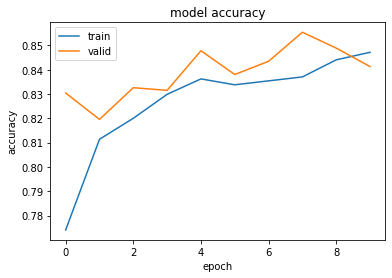

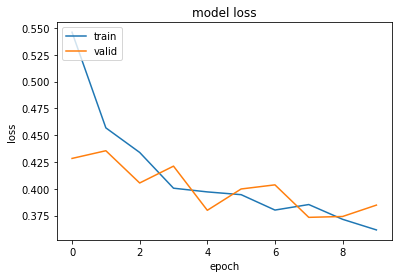

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
train_accu=model.evaluate(trainGen)
print("The training accuracy is: ",train_accu[1]*100,"%")
test_accu=model.evaluate(testGen)
print("The testing accuracy is: ",test_accu[1]*100,"%")

232/232 [==============================] - 247s 1s/step - loss: 0.3418 - accuracy: 0.8531
The training accuracy is:  85.31279563903809 %
924/924 [==============================] - 229s 246ms/step - loss: 0.3591 - accuracy: 0.8604
The testing accuracy is:  86.03895902633667 %


In [ ]:
testGen.reset()
X_test, y_test = next(testGen)
for i in range(int(len(testGen))-1): 
  img, label = next(testGen)
  X_test= np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(924, 224, 224, 3) (924, 4)


In [ ]:
pred=model.predict(X_test,batch_size=1,verbose=1)
print(np.argmax(pred[0]))
y_test[0]

924/924 [==============================] - 29s 28ms/step
1


array([0., 1., 0., 0.], dtype=float32)

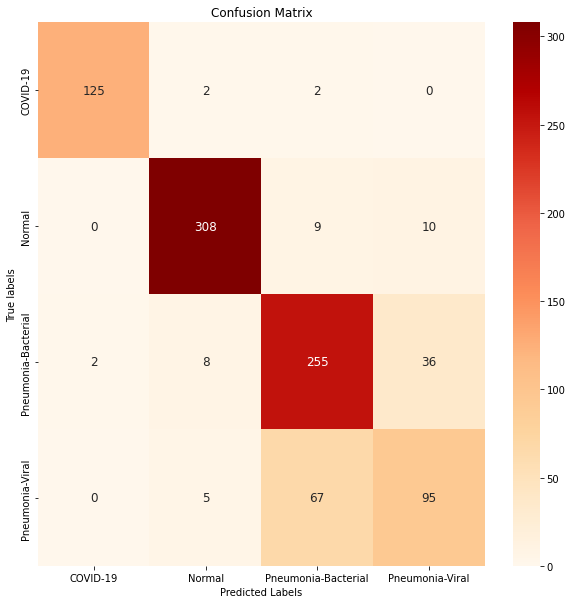

In [ ]:
#confusion matrix olusturma
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

y_pred = [np.argmax(i) for i in pred]
y_pred=tf.keras.utils.to_categorical(y_pred)

import seaborn as sns

lables = ['COVID-19','Normal','Pneumonia-Bacterial','Pneumonia-Viral']    
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g',cmap='OrRd',cbar=True,annot_kws={"size": 12}, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(lables,); ax.yaxis.set_ticklabels(lables)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,digits=3,target_names=['COVID-19','Normal','Pneumonia-Bacterial','Pneumonia-Viral']))


                     precision    recall  f1-score   support

           COVID-19      0.984     0.969     0.977       129
             Normal      0.954     0.942     0.948       327
Pneumonia-Bacterial      0.766     0.847     0.804       301
    Pneumonia-Viral      0.674     0.569     0.617       167

          micro avg      0.847     0.847     0.847       924
          macro avg      0.844     0.832     0.836       924
       weighted avg      0.846     0.847     0.845       924
        samples avg      0.847     0.847     0.847       924



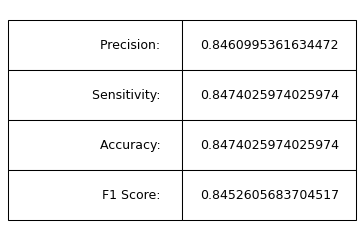

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import sensitivity_score 
import matplotlib.pyplot as plt 
from imblearn.metrics import specificity_score
fig = plt.figure(dpi=75)
ax = fig.add_subplot(1,1,1)
table=[
    ["Precision: ", precision_score(y_test, y_pred,average='weighted')],
    ["Sensitivity: ", recall_score(y_test, y_pred ,average='weighted')],
    ["Accuracy: ", accuracy_score(y_test, y_pred)],
    ["F1 Score: ", f1_score(y_test, y_pred,average='weighted')],
]
table = ax.table(cellText=table, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.show()